In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import matplotlib
matplotlib.__version__

'3.4.3'

In [62]:
df_returns = pd.read_csv('../nicole/data/Returns.csv')
df_orders = pd.read_csv('../nicole/data/Orders.csv')

#### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type 

In [4]:
#df_orders.info()

In [5]:
list_of_strings = df_orders['Sales'] 
list_of_strings = [s.replace("$", "") for s in list_of_strings]
list_of_strings = [s.replace(",", "") for s in list_of_strings]
df_orders['Sales'] = [float(i) for i in list_of_strings]

list_of_strings_P = df_orders['Profit'] 
list_of_strings_P = [s.replace("$", "") for s in list_of_strings]
list_of_strings_P = [s.replace(",", "") for s in list_of_strings]
df_orders['Profit'] = [float(i) for i in list_of_strings]

In [6]:
#df_orders['Sales']
#df_orders['Profit']

#### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [7]:
#extracting month as separate column
df_orders['Month'] = pd.DatetimeIndex(df_orders['Order.Date']).month

In [48]:
#grouping the data & turning it into new df
agg_month = df_orders.groupby(['Month', 'Category'])['Quantity'].sum().unstack()
df_agg_month = pd.DataFrame(agg_month)
df_agg_month.head()

#resets the index 
df_agg_month.reset_index(inplace = True)
df_agg_month.head()

#df_agg_month.column = ['Month', 'Furniture', 'Office Supplies', 'Technology’]

Category,Month,Furniture,Office Supplies,Technology
0,1,1750,5480,1642
1,2,1494,4340,1595
2,3,2098,6283,2009
3,4,2005,6391,2070
4,5,2484,8170,2542


In [47]:
#grouping the data & turning it into new df
agg_category = df_orders.groupby(['Category', 'Month'])['Quantity'].sum().unstack()
df_agg_category = pd.DataFrame(agg_category)

df_agg_category.reset_index(inplace = True)
df_agg_category.head()

Month,Category,1,2,3,4,5,6,7,8,9,10,11,12
0,Furniture,1750,1494,2098,2005,2484,3434,2157,3059,4111,3323,4471,4506
1,Office Supplies,5480,4340,6283,6391,8170,11012,6618,11019,12572,9585,13529,13245
2,Technology,1642,1595,2009,2070,2542,3563,2271,3518,3796,3395,4379,4396


In [59]:
#making another new df with agg values
df_agg = df_orders.groupby(['Month', 'Category']).agg({'Quantity': ['sum', 'count']}).reset_index()
df_agg.columns = ['Month', 'Category', 'sum', 'count']
df_agg.head()

,Month,Category,sum,count
0,1,Furniture,1750,491
1,1,Office Supplies,5480,1616
2,1,Technology,1642,504
3,2,Furniture,1494,424
4,2,Office Supplies,4340,1319


##### Visualization of Order Quantity by Category and Month

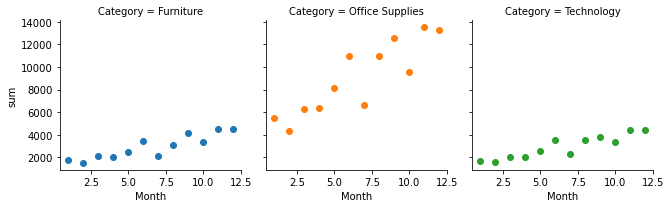

In [60]:
grid = sns.FacetGrid(df_agg, col = "Category", hue = "Category", col_wrap=5)
grid.map(plt.scatter, "Month", "sum")

##### Visualization of Order Quantity by Month and Category

[Text(0, 0, '1642.0'),
 Text(0, 0, '1595.0'),
 Text(0, 0, '2009.0'),
 Text(0, 0, '2070.0'),
 Text(0, 0, '2542.0'),
 Text(0, 0, '3563.0'),
 Text(0, 0, '2271.0'),
 Text(0, 0, '3518.0'),
 Text(0, 0, '3796.0'),
 Text(0, 0, '3395.0'),
 Text(0, 0, '4379.0'),
 Text(0, 0, '4396.0')]

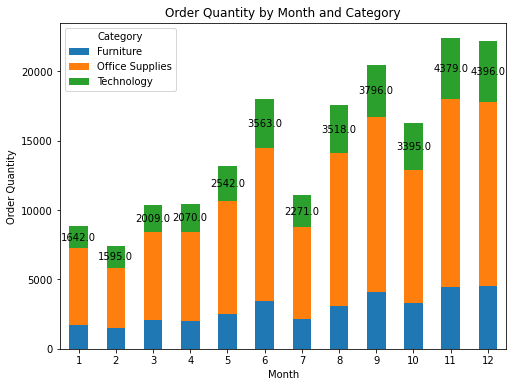

In [11]:
ax = df_agg_month.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Month', ylabel='Order Quantity')
plt.title('Order Quantity by Month and Category')

for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

ax.bar_label(c, labels=labels, label_type='center')    

#### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.


In [112]:
#merge dateframes
df_merged = pd.merge(df_orders,df_returns,left_on='Order.ID',right_on='Order ID')
df_merged = df_merged.drop('Region_y', axis = 1)
df_merged['Region'] = df_merged['Region_x']
df_merged['Region'] = df_merged['Region_x']
df_merged.head(1)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Order ID,Region
0,30191,IN-2012-PB19210127-41259,12/16/12,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Lesro Conference Table, with Bottom Storage","$1,715.16",2,0.0,$720.36,725.57,Critical,Yes,IN-2012-PB19210127-41259,Eastern Asia


In [124]:
#convert Profit to float
list_of_strings_2 = df_merged['Profit'] 
list_of_strings_2 = [s.replace("$", "") for s in list_of_strings_2]
list_of_strings_2 = [s.replace(",", "") for s in list_of_strings_2]
df_merged['Profit'] = [float(i) for i in list_of_strings_2]

In [125]:
#convert Returned to str
df_merged['Returned'] = df_merged['Returned'].astype(str)

##### 1. How much profit did we lose due to returns each year?

In [130]:
df_merged.query("Returned == 'Yes'")['Profit'].sum()

61370.75

In [127]:
df_merged.groupby('Returned')['Profit'].sum()

Returned
Yes    61370.75
Name: Profit, dtype: float64

##### 2. How many customer returned more than once? more than 5 times?

In [155]:
#creating new df
df_returns_customer = df_merged.groupby('Customer.ID').agg({'Customer.ID':['count']}).reset_index()
df_returns_customer.columns = ['Customer.ID', 'count']

In [156]:
df_returns_customer[df_returns_customer['count']>5].sum()

Customer.ID    AB-1016545AB-60086AG-675117AJ-1096031AM-107051...
count                                                        328
dtype: object

In [157]:
df_returns_customer[df_returns_customer['count']>1].sum()

Customer.ID    AA-1064559AB-1001527AB-10105101AB-10165139AB-1...
count                                                       1706
dtype: object

###### 3. Which regions are more likely to return orders?

In [96]:
df_agg_3 = df_merged.groupby('Region').agg({'Returned': ['count']}).reset_index()
df_agg_3.columns = ['Region', 'count']

df_agg_3.sort_values(by=['count'], ascending=False).head()

,Region,count
3,Central America,248
21,Western Europe,233
22,Western US,177
12,Oceania,154
14,Southeastern Asia,140


##### 4. Which categories (sub-categories) of products are more likely to be returned

In [169]:
df_categories = df_merged.groupby(['Category','Sub.Category']).agg({'Sub.Category': ['count']}).reset_index()
df_categories

Category Sub.Category      
                                 count
0         Furniture    Bookcases   104
1         Furniture       Chairs   147
2         Furniture  Furnishings   135
3         Furniture       Tables    41
4   Office Supplies   Appliances    59
5   Office Supplies          Art   217
6   Office Supplies      Binders   269
7   Office Supplies    Envelopes    99
8   Office Supplies    Fasteners   102
9   Office Supplies       Labels   137
10  Office Supplies        Paper   150
11  Office Supplies      Storage   212
12  Office Supplies     Supplies   103
13       Technology  Accessories   138
14       Technology      Copiers    99
15       Technology     Machines    63
16       Technology       Phones   145

In [165]:
df_returned_categories = df_merged.groupby(['Returned','Category','Sub.Category']).agg({'Sub.Category': ['count']}).reset_index()
df_returned_categories


Returned         Category Sub.Category      
                                          count
0       Yes        Furniture    Bookcases   104
1       Yes        Furniture       Chairs   147
2       Yes        Furniture  Furnishings   135
3       Yes        Furniture       Tables    41
4       Yes  Office Supplies   Appliances    59
5       Yes  Office Supplies          Art   217
6       Yes  Office Supplies      Binders   269
7       Yes  Office Supplies    Envelopes    99
8       Yes  Office Supplies    Fasteners   102
9       Yes  Office Supplies       Labels   137
10      Yes  Office Supplies        Paper   150
11      Yes  Office Supplies      Storage   212
12      Yes  Office Supplies     Supplies   103
13      Yes       Technology  Accessories   138
14      Yes       Technology      Copiers    99
15      Yes       Technology     Machines    63
16      Yes       Technology       Phones   145

## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.


In [171]:
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

# Option to display all dataframes columns
pd.options.display.max_columns = None

#### Cleaning Data

In [285]:
ml_returns = pd.read_csv('../nicole/data/Returns.csv')
ml_orders = pd.read_csv('../nicole/data/Orders.csv')

In [286]:
#converting str to numeric for Sales and Profit
list_of_strings = ml_orders['Sales'] 
list_of_strings = [s.replace("$", "") for s in list_of_strings]
list_of_strings = [s.replace(",", "") for s in list_of_strings]
ml_orders['Sales'] = [float(i) for i in list_of_strings]

list_of_strings_P = ml_orders['Profit'] 
list_of_strings_P = [s.replace("$", "") for s in list_of_strings_P]
list_of_strings_P = [s.replace(",", "") for s in list_of_strings_P]
ml_orders['Profit'] = [float(i) for i in list_of_strings_P]

In [300]:
#merging date frames
ml_merged = ml_orders.merge(ml_returns,left_on='Order.ID',right_on='Order ID', how= 'left')
ml_merged = ml_merged.drop('Region_y', axis = 1)
ml_merged['Region'] = ml_merged['Region_x']
ml_merged.head(1)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Order ID,Region
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,NaN,NaN,Central US


In [299]:
#convert to date format
ml_merged['Order.Date'] = pd.DatetimeIndex(ml_merged['Order.Date'])
ml_merged['Ship.Date'] = pd.DatetimeIndex(ml_merged['Ship.Date'])

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”

In [302]:
ml_merged.Returned.sort_values(ascending = True)

26       Yes
35334    Yes
35324    Yes
35287    Yes
35267    Yes
        ... 
51285    NaN
51286    NaN
51287    NaN
51288    NaN
51289    NaN
Name: Returned, Length: 51290, dtype: object

In [303]:
#turn yes into 1 or 0
ml_merged['Returned'] = ml_merged['Returned'].map(lambda x: 1 if x == 'Yes' else 0)

In [277]:
#dropping orders that were not returned
#ml_merged['Returned'].value_counts(dropna=False)

0    51290
Name: Returned, dtype: int64

In [305]:
#ml_merged = ml_merged.iloc[: , :-1]
ml_merged

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,0
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,0
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,0
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,0
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,0
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,0
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,0
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,0


In [306]:
#check log of returned products
cols = ['Customer.ID', 'Order.ID', 'Product.ID', 'Quantity', 'Returned']
ml_merged[cols].sort_values('Returned', ascending = False).head(10)

,Customer.ID,Order.ID,Product.ID,Quantity,Returned
44163,BF-1117048,ES-2013-BF1117048-41527,OFF-BI-2919,1,1
28340,GD-1459092,ID-2015-GD1459092-42144,OFF-EN-3097,2,1
48940,CM-124458,ES-2013-CM124458-41375,OFF-LA-4686,5,1
42750,TS-2134055,US-2013-TS2134055-41356,OFF-AR-3484,2,1
11610,AT-1073545,ES-2015-AT1073545-42367,OFF-AR-3450,2,1
42748,GA-1472598,US-2013-GA1472598-41599,FUR-FU-4101,3,1
45839,LS-1697518,MX-2014-LS1697518-41666,OFF-LA-4542,2,1
40141,ES-1408018,MX-2013-ES1408018-41619,OFF-FA-3044,2,1
28354,AM-103607,IN-2014-AM103607-41864,OFF-ST-4029,2,1
23940,EH-1412555,MX-2013-EH1412555-41276,FUR-FU-3953,4,1


##### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [309]:
ml_merged['Order.Date'] = pd.DatetimeIndex(ml_merged['Order.Date'])
ml_merged['Ship.Date'] = pd.DatetimeIndex(ml_merged['Ship.Date'])

In [311]:
ml_merged['Fulfillment_duration_days'] = ml_merged['Ship.Date'] - ml_merged['Order.Date']
ml_merged['Fulfillment_duration_days']

0       2 days
1       2 days
2       1 days
3       2 days
4       1 days
         ...  
51285   0 days
51286   4 days
51287   5 days
51288   4 days
51289   4 days
Name: Fulfillment_duration_days, Length: 51290, dtype: timedelta64[ns]

##### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [313]:
returned_products = ml_merged.groupby(['Product.ID']).agg({'Returned': ['count']}).reset_index()
returned_products.columns = ['Product.ID', 'return_count']

ml_merged = ml_merged.merge(returned_products, on='Product.ID', how='left')
ml_merged

returned_products.sort_values(by=['return_count'], ascending=False).head()

,Product.ID,return_count
1907,OFF-FA-6129,227
1456,OFF-BI-3737,92
2549,OFF-ST-4057,90
2654,OFF-ST-5693,84
1551,OFF-BI-4828,83


#### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Note that there are only less than 5% of the orders have been returned, so you should consider using the [createDataPartition](https://www.rdocumentation.org/packages/caret/versions/6.0-80/topics/createDataPartition) function from `caret` package and [StratifiedKfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) from sklearn when running cross-validation.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.


#### step 1: create dummies

In [345]:
ml_merged['Returned'].value_counts(normalize=False)

0    49070
1     2220
Name: Returned, dtype: int64

In [393]:
ml_merged['Returned'].value_counts(normalize=True)

0    0.956717
1    0.043283
Name: Returned, dtype: float64

In [353]:
#ml_merged = ml_merged.iloc[: , :-1]
ml_merged.Returned.sort_values()

0        0
33775    0
33776    0
33777    0
33778    0
        ..
26716    1
34919    1
34918    1
49467    1
13067    1
Name: Returned, Length: 51290, dtype: int64

In [354]:
print(sorted(ml_merged.columns))

['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name', 'Discount', 'Fulfillment_duration_days', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Postal.Code', 'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region_x', 'Returned', 'Row.ID', 'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State', 'Sub.Category']


In [356]:
#Group features 

numeric_features = ['Discount', 'Process.Time', 'Product.ID.Return.Count', 'Product.ID.Return.Ratio', 
                    'Profit', 'Quantity', 'Sales', 'Shipping.Cost']

categorical_features = ['Category', 'Market', 'Order.Priority', 'Segment', 'Ship.Mode']

features = (numeric_features + categorical_features)

In [357]:
# Use get_dummies for categorical variables & assign dependent variable
X = pd.get_dummies(ml_merged[categorical_features], drop_first=True)
y = ml_merged['Returned']

In [358]:
print(X.shape)
print(y.shape)

(51290, 14)
(51290,)


In [360]:
#X.head(3)

#### step 2: train/test split
 - simple split methodolgy, then evaluate
 - Kfold vs Stratified Kfold methodologies for cross validation
 - evaluate logistic regression models (next step)

##### Simple split

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [341]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41032, 14)
(10258, 14)
(41032,)
(10258,)


##### Simple Logistic Regression

In [378]:
#import stuff
from sklearn.linear_model import LogisticRegression

In [400]:
LR = LogisticRegression(class_weight='balanced', max_iter = 10000)

In [399]:
#logistic regression assessment 
logistic = LogisticRegression(C=1e8, solver='liblinear')

logistic.fit(X_train, y_train)
print(logistic.score(X_train, y_train))
print(logistic.score(X_test, y_test))

0.956716708910119
0.956716708910119


##### Cross validation with Stratifed K folds

In [391]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#X = features
#y = ml_merged['Returned']

#skf = StratifiedKFold(n_splits=5)
#skf.get_n_splits(X, y)

###### Churn rate for SKfold vs Kfold + CV breakdown

In [382]:
## running grid sscore for skfold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

result = {}
for C in [0.0001, 0.01, 1, 100, 10000, 1000000, 100000000]:
    logistic = LogisticRegression(C=C, solver='liblinear')
    result[C] = cross_val_score(logistic, X_train, y_train, cv=skf).mean()
    
result

{0.0001: 0.9567167105376984,
 0.01: 0.9567167105376984,
 1: 0.9567167105376984,
 100: 0.9567167105376984,
 10000: 0.9567167105376984,
 1000000: 0.9567167105376984,
 100000000: 0.9567167105376984}

In [390]:
#K Fold - note distribution is off
kf = KFold(n_splits=3, shuffle=True, random_state=0)
for training_idx, validation_idx in kf.split(X_train, y_train):
    print("The churn rate of the training set of this fold is {}.".format(y_train.iloc[training_idx].mean()))
    print("The churn rate of the validation set of this fold is {}.".format(y_train.iloc[validation_idx].mean()))
    print("\n")

The churn rate of the training set of this fold is 0.043576807779483806.
The churn rate of the validation set of this fold is 0.042696300628746894.


The churn rate of the training set of this fold is 0.04309998172180589.
The churn rate of the validation set of this fold is 0.04364992322877824.


The churn rate of the training set of this fold is 0.04317309449826357.
The churn rate of the validation set of this fold is 0.04350369233018937.




In [388]:
#Stratified K Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
for training_idx, validation_idx in skf.split(X_train, y_train):
    print("The churn rate of the training set of this fold is {}.".format(y_train.iloc[training_idx].mean()))
    print("The churn rate of the validation set of this fold is {}.".format(y_train.iloc[validation_idx].mean()))
    print("\n")

The churn rate of the training set of this fold is 0.043284345982306065.
The churn rate of the validation set of this fold is 0.04328118145927767.


The churn rate of the training set of this fold is 0.0432827636629501.
The churn rate of the validation set of this fold is 0.043284345982306065.


The churn rate of the training set of this fold is 0.0432827636629501.
The churn rate of the validation set of this fold is 0.043284345982306065.




In [ ]:
lm = LogisticRegression(C=1, solver='liblinear')

scores = []
for training_idx, validation_idx in kfold.split(X_train, y_train):
    lm.fit(X_train, y_train)
    scores.append(
        lm.score(X_train, y_train.iloc[validation_idx]))
    
print(
    "The 'cross-validation score' for the logistic regression with C={} is {}".format(
        lm.get_params()["C"], np.mean(scores)))

In [377]:
#import sutff
from sklearn.metrics import confusion_matrix, roc_auc_score

In [ ]:
from sklearn.metrics import 

#### step 3: model evaluation

#### Confusion Matrix

thoughts: this model is not good lol, we are overfitting with # of features, should probably get rid of features that cause this

#### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business problem.

In [372]:
#create confusion matrix formula
#why is this creating no TP? 
def get_confusion_matrix(bi_clf, X, y, thres=0.5):
    
    return confusion_matrix(
        y,
        bi_clf.predict_proba(X)[:,1] > thres
    )

get_confusion_matrix(logistic, X_test, y_test, .80)

array([[14721,     0],
       [  666,     0]])

#### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not